# 河间地下水非稳定流演示

## 承压水

**数学模型**

$$
\left\{
\begin{array}{l}
a\frac{\partial^2H}{\partial x^2}=\frac{\partial H}{\partial t}\\
H(x,0)=h_0\\
H(0,t)=h_{0t} \\
H(L,t)=h_{Lt}
\end{array}
\right.
$$


式中，$a=T/S$.

记 $\Delta{h_0}=h_{0t}-h_0$，$\Delta{h_L}=h_{Lt}-h_0$，$\bar{x}=\frac{x}{l}$，$\bar{t}=\frac{at}{l^2}$。

**河渠水位**

$$
H(x,t)-h_0=\Delta h_0F(\bar{x},\bar{t})+\Delta h_LF'(\bar{x},\bar{t})
$$

式中

$$
\begin{array}{rl}
F(\bar{x},\bar{t})&=1-\bar{x}-
  \frac{2}{\pi}\sum\limits_{n=1}^\infty \frac{1}{n} \sin(
  n\pi \bar{x})\mathrm{e}^{-(n\pi)^2\bar{t}} \\
F'(\bar{x},\bar{t}) &=\bar{x}-\frac{2}{\pi}\sum\limits_{n=1}^\infty \frac{(-1)^{n+1}}{n} \sin(
  n\pi \bar{x})\mathrm{e}^{-(n\pi)^2\bar{t}}
\end{array}
$$

$F(\bar{x},\bar{t})$ 为河渠水位函数，$F'(\bar{x},\bar{t})$ 为河渠水位余函数，且 $F'(\bar{x},\bar{t})=F(1-\bar{x},\bar{t})$


**计算河渠水位的函数**

In [1]:
import numpy as np

np.set_printoptions(precision=4)

# 河渠水位函数
def river_head(t, x, nmax):
    if t <=0:
        f = 0.0
    else:
        f = 1.0 - x
        for n in range(1, nmax + 1):
            alpha = n * np.pi
            term = -2.0 * np.sin(alpha*x) * np.exp(-t*alpha**2) / alpha
            f = f + term
    return f

# 将函数向量化
river_head = np.vectorize(river_head)

>
> 问题：计算水位函数与流量函数，取前几项和可满足精度要求？
>

In [2]:
x = np.linspace(0,1,11)

t = 0.4

nmax = 20
print('水位 (t = {},'.format(t), 'nmax = {}):'.format(nmax))
print(river_head(t, x, nmax))

nmax = 50
print('水位 (t = {},'.format(t), 'nmax = {}):'.format(nmax))
print(river_head(t, x, nmax)) 

水位 (t = 0.4, nmax = 20):
[ 1.0000e+00  8.9620e-01  7.9278e-01  6.9006e-01  5.8832e-01  4.8772e-01
  3.8832e-01  2.9006e-01  1.9278e-01  9.6204e-02 -1.5044e-18]
水位 (t = 0.4, nmax = 50):
[ 1.0000e+00  8.9620e-01  7.9278e-01  6.9006e-01  5.8832e-01  4.8772e-01
  3.8832e-01  2.9006e-01  1.9278e-01  9.6204e-02 -1.5044e-18]


**单宽流量**

$$
q_{x,t}=-T\frac{dH}{dx}=\frac{T}{l}\left\lbrack\Delta h_1G(\bar{x},\bar{t})-\Delta h_2G'(\bar{x},\bar{t})\right\rbrack
$$

式中,

$$
\begin{split}
G(\bar{x},\bar{t})&=-\frac{dF}{d\bar{x}}
=1+2\sum_{n=1}^{\infty}\cos(n\pi\bar{x})e^{-n^2\pi^2\bar{t}}\\
G'(\bar{x},\bar{t})&=\frac{dF'}{d\bar{x}}
=1+2\sum_{n=1}^{\infty}(-1)^n\cos(n\pi\bar{x})e^{-n^2\pi^2\bar{t}}
\end{split}
$$

$G(\bar{x},\bar{t})$ 为河渠流量函数，$G'(\bar{x},\bar{t})$ 为河渠流量余函数，$G'(\bar{x},\bar{t})=G(1-\bar{x},\bar{t})$.

**计算河渠流量的函数**

In [3]:
import numpy as np

# np.set_printoptions( ) 控制显示的小数位, 默认 8 位小数位. 可用 formatter 参数自定义显示的格式
# 例如: np.set_printoptions(formatter={'float': '{:.2f}'.format})
np.set_printoptions(precision=4)

# 河渠流量函数
def river_flow(t, x, nmax):
    if t <=0:
        g = 0.0
    else:
        g = 1.0
        for n in range(1, nmax + 1):
            alpha = n * np.pi
            term = 2.0 * np.cos(alpha*x) * np.exp(-t*alpha**2) 
            g = g + term
    return g

# 将函数向量化
river_flow = np.vectorize(river_flow)


In [4]:
x = np.linspace(0,1,11)

t = 0.4

nmax = 20
print('水位 (t = {},'.format(t), 'nmax = {}):'.format(nmax))
print(river_flow(t, x, nmax))

nmax = 50
print('水位 (t = {},'.format(t), 'nmax = {}):'.format(nmax))
print(river_flow(t, x, nmax)) 

水位 (t = 0.4, nmax = 20):
[1.0386 1.0367 1.0312 1.0227 1.0119 1.     0.9881 0.9773 0.9688 0.9633
 0.9614]
水位 (t = 0.4, nmax = 50):
[1.0386 1.0367 1.0312 1.0227 1.0119 1.     0.9881 0.9773 0.9688 0.9633
 0.9614]


## 潜水

**数学模型**

$$
\left\{\begin{array}{l}
\frac{\partial h}{\partial t}
=\frac{K}{\mu}\frac{\partial}{\partial x}\left(h\frac{\partial h}{\partial x}\right)\\
h^2(x,0)=(1-\frac{x}{l})h_{0,0}^2+\frac{x}{l}h_{l,0}^2\\
h(0,t)=h_{0,t} \\
h(l,t)=h_{l,t}
\end{array}\right.
$$

记 $\Delta(h_{0,t}^2)=h_{0,t}^2-h_{0,0}^2$，$\Delta(h_{l,t}^2)=h_{l,t}^2-h_{l,0}^2$，$\bar{x}=\frac{x}{l},\bar{t}=\frac{at}{l^2}$

**河渠水位**

$$
h^2_{x,t}-h^2_{x,0}=\Delta(h_{0,t}^2)F(\bar{x},\bar{t})
+\Delta(h_{l,t}^2)F'(\bar{x},\bar{t})
$$

**单宽流量**

$$
q_{x,t}=-Kh\frac{dh}{dx}=q_{x,0}+\frac{K}{2l}\left(\Delta h_{0,t}^{2}G(\bar{x},\bar{t})-
\Delta h_{l,t}^{2}G'(\bar{x},\bar{t})\right)
$$

式中

$$
q_{x,0}=K\frac{h_{0,0}^2-h_{l,0}^2}{2l}
$$

## 绘图演示 - 潜水

**库文件导入与设置**

In [5]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

import mpl_interactions.ipyplot as iplt

**设置一些初始参数**

In [6]:
L = 1000 # aquifer length, m
K = 10 # hydraulic conductivity, m/d
H = 40 # aquifer top
zt = 30 # water level top, m
zb = 10 # aquifer bottom, m
mu = 0.15 # specific yield 
a = K * 30 / mu 

**计算水头的函数**

In [7]:
# hydraulic head

def head(x, h0_, hl_, h0t, hlt, t):
    h02_ = h0_**2 - (h0_**2 - hl_**2) * x /L
    t_ = a * t /L /L
    x_ = x /L
    dh0 = h0t*h0t-h0_*h0_
    dhl = hlt*hlt-hl_*hl_
    ht = h02_ + dh0*river_head(t_, x_, 20) + dhl*river_head(t_, 1 - x_, 20)
    return np.sqrt(ht)


**可交互的绘图程序**

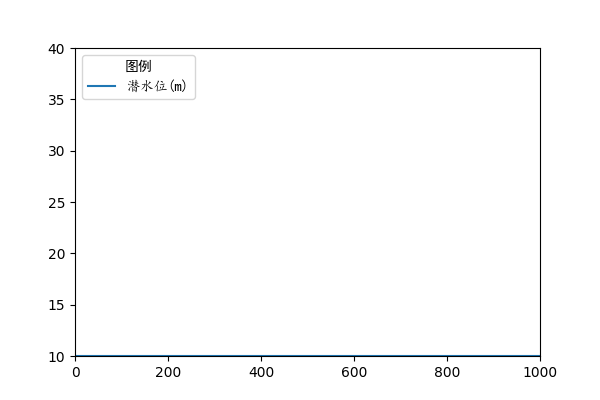

In [8]:
# make the interactive figure

x = np.linspace(0, L, 101)
t = np.linspace(0, 1000, 1001)
h0_ = np.linspace(zb, zt, 201)
hl_ = h0_
h0t = np.linspace(zb, H, 301)
hlt = h0t

fig, ax = plt.subplots(figsize=[6, 4])

ax.set_xlim(0, L)
ax.set_ylim(zb, H)

controls = iplt.plot(x, head, h0_=h0_, hl_=hl_,
                     h0t=h0t, hlt=hlt, t=t,
                     label="潜水位(m)")

plt.legend(prop={'family': 'KaiTi'},
           handlelength=2, loc=2,
           title="图例",
           title_fontproperties={'family': 'SimHei'})


In [9]:
plt.savefig('plot.svg', format='svg')